In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
sales=pd.read_csv('C://Users//vansh//Downloads//data//qsales.csv')

In [4]:
sales.head()

,Quarter,Sales_$1000
0,1,680
1,2,600
2,3,745
3,4,925
4,5,920


In [6]:
sales.tail()

,Quarter,Sales_$1000
15,16,2030
16,17,2100
17,18,1650
18,19,2300
19,20,2700


In [10]:
x=np.array(sales.Quarter).reshape(-1,1)
y=sales['Sales_$1000']

In [11]:
lr=LinearRegression()

In [12]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
lr.coef_

array([92.5])

In [14]:
lr.intercept_

374.9999999999999

In [15]:
pred=lr.predict(x)

In [16]:
pred

array([ 467.5,  560. ,  652.5,  745. ,  837.5,  930. , 1022.5, 1115. ,
       1207.5, 1300. , 1392.5, 1485. , 1577.5, 1670. , 1762.5, 1855. ,
       1947.5, 2040. , 2132.5, 2225. ])

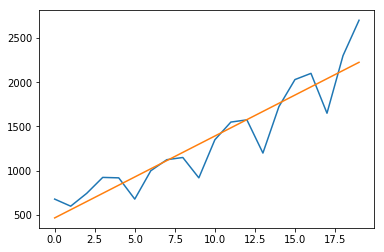

In [18]:
plt.plot(y)
plt.plot(pred)

In [19]:
rmse=np.sqrt(mean_squared_error(y,pred))

In [22]:
rmse.round(3)

222.861

In [23]:
#mean absolute percentage error
mape=np.mean(np.abs((y-pred)/y))

In [25]:
mape

0.13910136657807937

In [54]:
result=pd.DataFrame({'model':'Linear Regression-only trend','rmse':[rmse],'mape':[mape]})

In [55]:
result

,model,rmse,mape
0,Linear Regression-only trend,136.04032,0.094182


#### the data has seasonality so we will so we will add new variable x to denote seasonality

In [30]:
q_str=('q1','q2','q3','q4')
sales['qnew']=q_str*5

In [31]:
sales.head()

,Quarter,Sales_$1000,qnew
0,1,680,q1
1,2,600,q2
2,3,745,q3
3,4,925,q4
4,5,920,q1


In [40]:
sales_new=pd.get_dummies(sales,drop_first=True)

In [41]:
sales_new

,Quarter,Sales_$1000,qnew_q2,qnew_q3,qnew_q4
0,1,680,0,0,0
1,2,600,1,0,0
2,3,745,0,1,0
3,4,925,0,0,1
4,5,920,0,0,0
5,6,680,1,0,0
6,7,1000,0,1,0
7,8,1125,0,0,1
8,9,1150,0,0,0
9,10,920,1,0,0


In [42]:
x=sales_new.drop('Sales_$1000',axis=1)
y=sales['Sales_$1000']

In [43]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
pred=lr.predict(x)

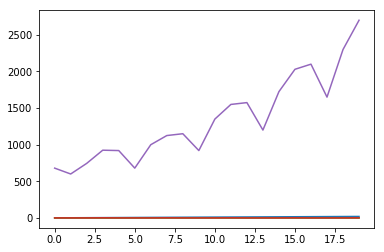

In [82]:
pred
plt.plot(x)
plt.plot(y)

In [46]:
rmse=np.sqrt(mean_squared_error(y,pred))

In [47]:
rmse

136.0403203098258

In [48]:
mape=np.mean(np.abs((y-pred)/y))

In [50]:
tempresult=pd.DataFrame({'model':'linear with seasonality','rmse':[rmse],'mape':[mape]})

In [52]:
tempresult

,model,rmse,mape
0,linear with seasonality,136.04032,0.094182


In [56]:
pd.concat([result,tempresult])

,model,rmse,mape
0,Linear Regression-only trend,136.04032,0.094182
0,linear with seasonality,136.04032,0.094182


In [58]:
df=pd.read_csv('C://Users//vansh//Downloads//data//AirPax.csv',parse_dates=[['Year','Month']],index_col=0)

In [59]:
df

,Pax
Year_Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [60]:
train=df[0:int(len(df)*0.7)]
test=df[int(len(df)*0.7):]

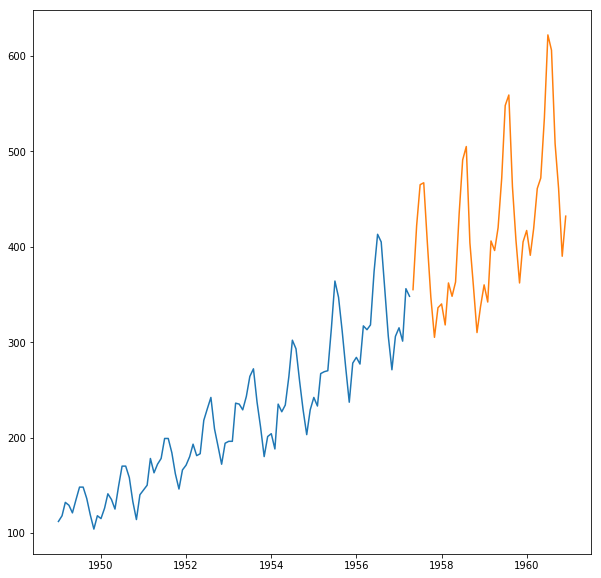

In [62]:
plt.figure(figsize=[10,10])
plt.plot(train)
plt.plot(test)

# method1: regression on time

In [64]:
time=[i+1 for i in range(len(df))]

In [66]:
df1=df.copy()
df1['time']=time

In [67]:
df1.head()

,Pax,time
Year_Month,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5


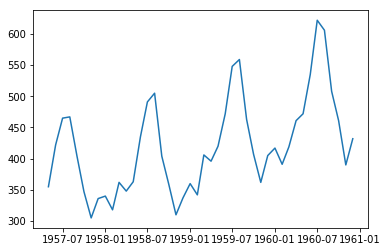

In [101]:
train=df1[0:int(len(df)*0.7)]
test=df1[int(len(df)*0.7):]
plt.plot(test["Pax"])

In [88]:
x_train=train.drop('Pax',axis=1)
x_test=test.drop('Pax',axis=1)
y_train=train['Pax']
y_test=test[['Pax']]

In [89]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
pred=lr.predict(x_test)

In [91]:
pred

array([336.25090909, 338.58538254, 340.91985599, 343.25432943,
       345.58880288, 347.92327633, 350.25774977, 352.59222322,
       354.92669667, 357.26117012, 359.59564356, 361.93011701,
       364.26459046, 366.59906391, 368.93353735, 371.2680108 ,
       373.60248425, 375.9369577 , 378.27143114, 380.60590459,
       382.94037804, 385.27485149, 387.60932493, 389.94379838,
       392.27827183, 394.61274527, 396.94721872, 399.28169217,
       401.61616562, 403.95063906, 406.28511251, 408.61958596,
       410.95405941, 413.28853285, 415.6230063 , 417.95747975,
       420.2919532 , 422.62642664, 424.96090009, 427.29537354,
       429.62984698, 431.96432043, 434.29879388, 436.63326733])

In [96]:
y_test['Regrontime']=pred
y_test['Regrontime']

Year_Month
1957-05-01    336.250909
1957-06-01    338.585383
1957-07-01    340.919856
1957-08-01    343.254329
1957-09-01    345.588803
1957-10-01    347.923276
1957-11-01    350.257750
1957-12-01    352.592223
1958-01-01    354.926697
1958-02-01    357.261170
1958-03-01    359.595644
1958-04-01    361.930117
1958-05-01    364.264590
1958-06-01    366.599064
1958-07-01    368.933537
1958-08-01    371.268011
1958-09-01    373.602484
1958-10-01    375.936958
1958-11-01    378.271431
1958-12-01    380.605905
1959-01-01    382.940378
1959-02-01    385.274851
1959-03-01    387.609325
1959-04-01    389.943798
1959-05-01    392.278272
1959-06-01    394.612745
1959-07-01    396.947219
1959-08-01    399.281692
1959-09-01    401.616166
1959-10-01    403.950639
1959-11-01    406.285113
1959-12-01    408.619586
1960-01-01    410.954059
1960-02-01    413.288533
1960-03-01    415.623006
1960-04-01    417.957480
1960-05-01    420.291953
1960-06-01    422.626427
1960-07-01    424.960900
1960-08-01    

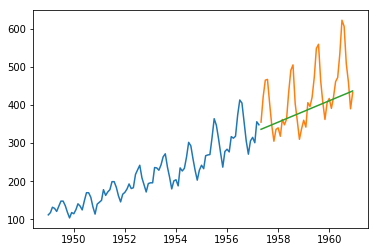

In [103]:
plt.plot(train['Pax'])
plt.plot(test["Pax"])
plt.plot(y_test['Regrontime'])

## method 2: regression on time with seasonal 

In [106]:
df1.tail()

,Pax,time
Year_Month,,
1960-08-01,606,140
1960-09-01,508,141
1960-10-01,461,142
1960-11-01,390,143
1960-12-01,432,144


In [108]:
months=['jan','feb','mar','april','may','june','july','aug','sep','oct','nov','dec']
df1['months']=months*12

In [109]:
df1.tail()

,Pax,time,months
Year_Month,,,
1960-08-01,606,140,aug
1960-09-01,508,141,sep
1960-10-01,461,142,oct
1960-11-01,390,143,nov
1960-12-01,432,144,dec


In [110]:
df_dummy=pd.get_dummies(df1,drop_first=True)

,Pax,time,months_aug,months_dec,months_feb,months_jan,months_july,months_june,months_mar,months_may,months_nov,months_oct,months_sep
Year_Month,,,,,,,,,,,,,
1949-01-01,112,1,0,0,0,1,0,0,0,0,0,0,0
1949-02-01,118,2,0,0,1,0,0,0,0,0,0,0,0
1949-03-01,132,3,0,0,0,0,0,0,1,0,0,0,0
1949-04-01,129,4,0,0,0,0,0,0,0,0,0,0,0
1949-05-01,121,5,0,0,0,0,0,0,0,1,0,0,0
1949-06-01,135,6,0,0,0,0,0,1,0,0,0,0,0
1949-07-01,148,7,0,0,0,0,1,0,0,0,0,0,0
1949-08-01,148,8,1,0,0,0,0,0,0,0,0,0,0
1949-09-01,136,9,0,0,0,0,0,0,0,0,0,0,1


In [121]:
train=df_dummy[0:int(len(df)*0.7)]
test=df_dummy[int(len(df)*0.7):]

In [129]:
x_train=train.drop('Pax',axis=1)
y_train=train[["Pax"]]
x_test=test.drop('Pax',axis=1)
y_test=test[['Pax']]

In [130]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [131]:
pred=lr.predict(x_test)
y_test['pred']=pred

C:\Users\vansh\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


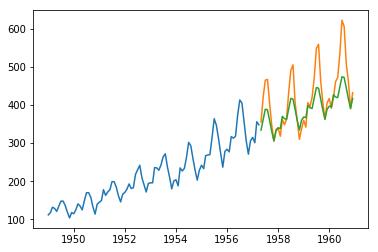

In [132]:
plt.plot(train['Pax'])
plt.plot(test['Pax'])
plt.plot(y_test['pred'])

# method3: naive approach

In [133]:
dd=np.asarray(train.Pax)
dd

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348], dtype=int64)

In [135]:
y_hat=test.copy()
y_hat.head()

,Pax,time,months_aug,months_dec,months_feb,months_jan,months_july,months_june,months_mar,months_may,months_nov,months_oct,months_sep
Year_Month,,,,,,,,,,,,,
1957-05-01,355,101,0,0,0,0,0,0,0,1,0,0,0
1957-06-01,422,102,0,0,0,0,0,1,0,0,0,0,0
1957-07-01,465,103,0,0,0,0,1,0,0,0,0,0,0
1957-08-01,467,104,1,0,0,0,0,0,0,0,0,0,0
1957-09-01,404,105,0,0,0,0,0,0,0,0,0,0,1


In [137]:
# y_hat['naive']=dd[len(dd)-1]
for i in range(len(y_hat)):
    if i==0:
        y_hat['naive']=np.nan
    else:
        y_hat['naive'][i]=y_hat.Pax[i-1]

C:\Users\vansh\Anaconda4\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


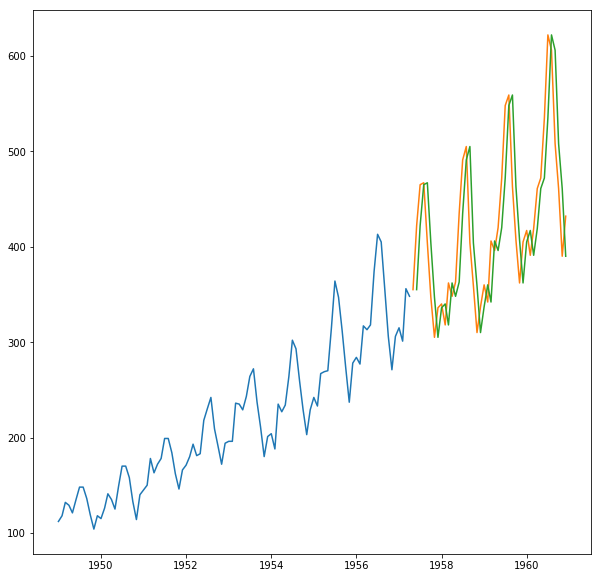

In [139]:
plt.figure(figsize=[10,10])
plt.plot(train['Pax'])
plt.plot(test['Pax'])
plt.plot(y_hat['naive'])

# method 4- Moving average

In [142]:
df1=df.copy()

In [141]:
df1['rolling average']=df1['Pax'].roll

,Pax,time,months_aug,months_dec,months_feb,months_jan,months_july,months_june,months_mar,months_may,months_nov,months_oct,months_sep
Year_Month,,,,,,,,,,,,,
1957-05-01,355,101,0,0,0,0,0,0,0,1,0,0,0
1957-06-01,422,102,0,0,0,0,0,1,0,0,0,0,0
1957-07-01,465,103,0,0,0,0,1,0,0,0,0,0,0
1957-08-01,467,104,1,0,0,0,0,0,0,0,0,0,0
1957-09-01,404,105,0,0,0,0,0,0,0,0,0,0,1
1957-10-01,347,106,0,0,0,0,0,0,0,0,0,1,0
1957-11-01,305,107,0,0,0,0,0,0,0,0,1,0,0
1957-12-01,336,108,0,1,0,0,0,0,0,0,0,0,0
1958-01-01,340,109,0,0,0,1,0,0,0,0,0,0,0
